# 1 Analyse and clean row data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.shape

(5110, 12)

In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### need to deal with null values of 'bmi' (Remove or using KNN imputer) 

In [5]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

#### 'age' can be int64

### stroke 

##### This is the target

In [6]:
data['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

#### It is imbalanced. Therefore, it requires upsampling / SMOTE, later

### gender 

In [7]:
data['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

#### In this case, remove 'other' and rename Female and Male with 'F' and 'M'. 

In [8]:
data = data[data['gender'] != 'Other']
data["gender"] = data["gender"].apply(lambda x: "F" if x in [ "Female"] else "M")
data['gender'].value_counts()

gender
F    2994
M    2115
Name: count, dtype: int64

### age 

In [9]:
data['age'] = data['age'].astype('int64')
data['age'].dtypes

dtype('int64')

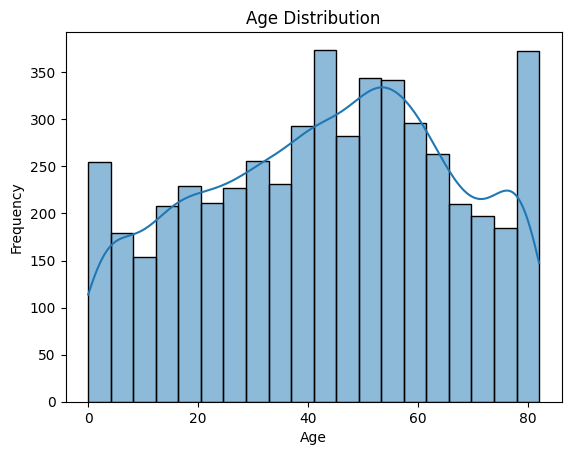

In [10]:
# Create a histogram using Seaborn
sns.histplot(data['age'], kde=True)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Display the plot
plt.show()

### hypertension

In [11]:
data['hypertension'].value_counts()

hypertension
0    4611
1     498
Name: count, dtype: int64

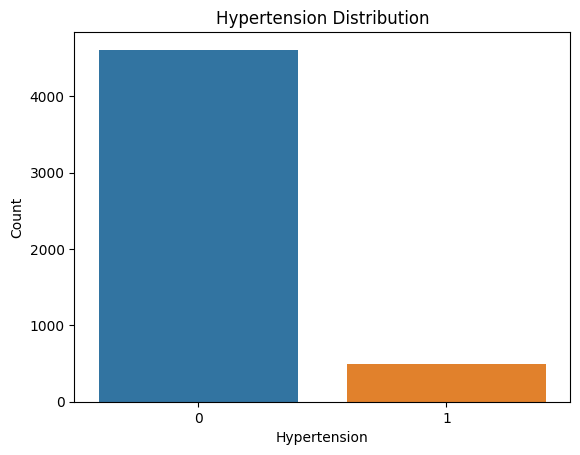

In [12]:
sns.countplot(x="hypertension", data=data)

# Set plot labels and title
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Hypertension Distribution')

# Display the plot
plt.show()

### heart_disease

In [13]:
data['heart_disease'].value_counts()

heart_disease
0    4833
1     276
Name: count, dtype: int64

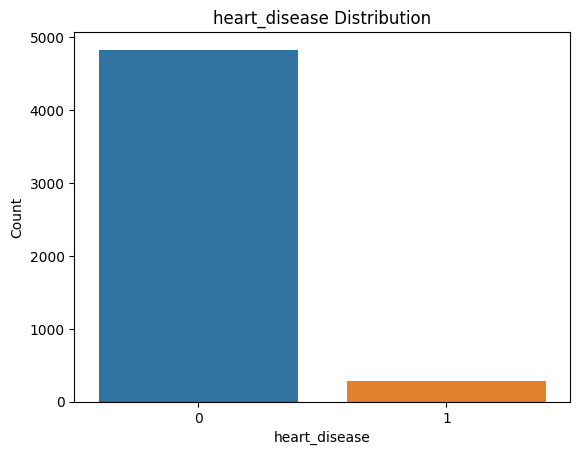

In [14]:
sns.countplot(x="heart_disease", data=data)

# Set plot labels and title
plt.xlabel('heart_disease')
plt.ylabel('Count')
plt.title('heart_disease Distribution')

# Display the plot
plt.show()

### ever_married

In [15]:
data['ever_married'].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

##### Values are 'Yes' and 'No', but the data type is 'int64'. The values are converted into 1 ('Yes') and 0 ('No'). 

In [16]:
data['ever_married'] = data['ever_married'].replace({'Yes': 1, 'No': 0})
display(data['ever_married'].value_counts())
display(data['ever_married'].dtypes)

ever_married
1    3353
0    1756
Name: count, dtype: int64

dtype('int64')

### work_type

In [17]:
data['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

##### To reduce the value nmaes, add 'children' and 'Never_worked' and rename 'Other' 

In [18]:
data['work_type'] = data['work_type'].apply(lambda x: 'Other' if x in ['children', 'Never_worked'] else x)
data['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
Other             709
Govt_job          657
Name: count, dtype: int64

### Residence_type

In [19]:
data['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

##### The column name is renamed. 

In [20]:

data1 = data.rename(columns={'Residence_type':'residence_type'})

### avg_glucose_level

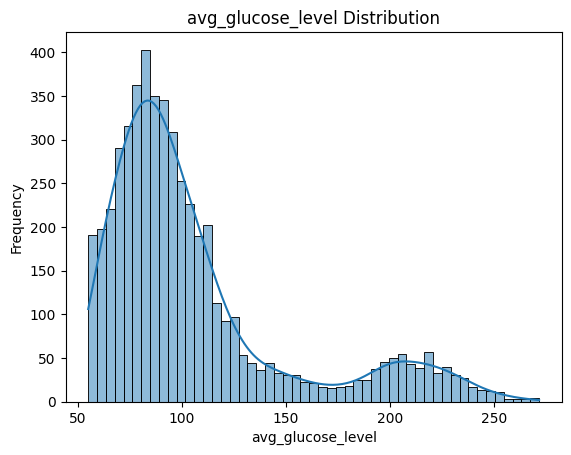

In [21]:
# Create a histogram using Seaborn
sns.histplot(data1['avg_glucose_level'], kde=True)

# Set plot labels and title
plt.xlabel('avg_glucose_level')
plt.ylabel('Frequency')
plt.title('avg_glucose_level Distribution')

# Display the plot
plt.show()

In [22]:
data1['avg_glucose_level'].skew()

1.5728153284961561

##### It is not strongly skewed, but it is better to apply transformation, later.

### bmi

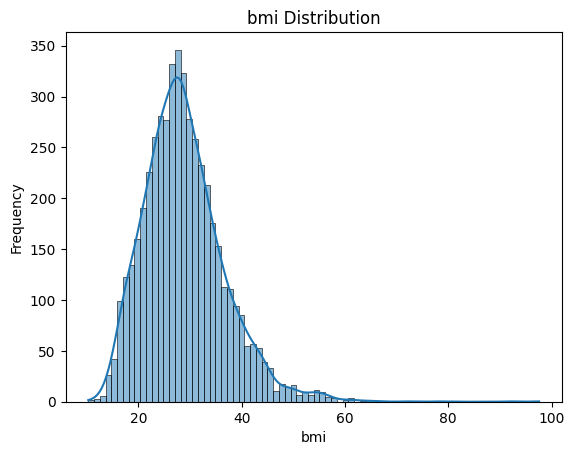

In [23]:
# Create a histogram using Seaborn
sns.histplot(data1['bmi'], kde=True)

# Set plot labels and title
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.title('bmi Distribution')

# Display the plot
plt.show()

In [24]:
data1['bmi'].skew()

1.0550629490426457

In [25]:
data1.shape

(5109, 12)

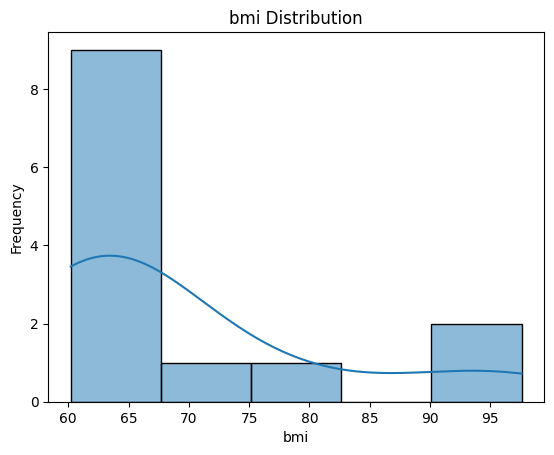

In [26]:
data2 = data1[data1['bmi'] > 60]


# Create a histogram using Seaborn
sns.histplot(data2['bmi'], kde=True)

# Set plot labels and title
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.title('bmi Distribution')

# Display the plot
plt.show()


In [27]:
data2['stroke'].value_counts()

stroke
0    13
Name: count, dtype: int64

In [28]:
data2['bmi']

270     60.9
358     64.8
466     60.2
544     71.9
928     78.0
1559    66.8
2128    97.6
2764    63.3
2840    61.2
3825    61.6
4188    64.4
4209    92.0
4838    60.9
Name: bmi, dtype: float64

It shows that people with high bmi do not have stroke. So, it does not affect the prediction of stroke.  Therefore, the values more than 60 are removed.

In [30]:
data3 = data1[(data1['bmi'] < 60) | pd.isnull(data1['bmi'])]

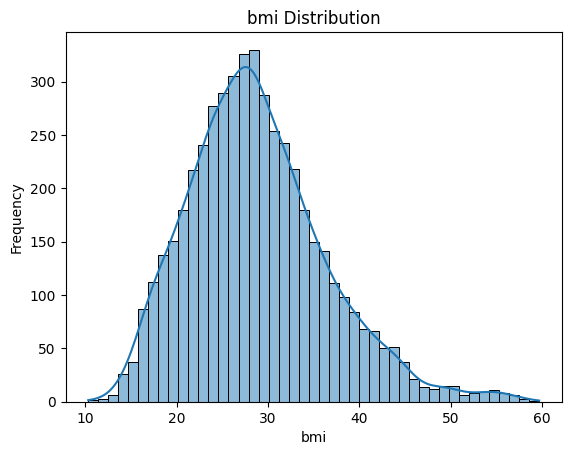

In [31]:
# Create a histogram using Seaborn
sns.histplot(data3['bmi'], kde=True)

# Set plot labels and title
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.title('bmi Distribution')

# Display the plot
plt.show()

In [33]:
data3.shape

(5096, 12)

### smoking_status

In [34]:
data3['smoking_status'].value_counts()

smoking_status
never smoked       1887
Unknown            1540
formerly smoked     884
smokes              785
Name: count, dtype: int64

## remove id

##### ID is not required for stroke prediction. So, it is removed.  

In [35]:
data3.drop('id', axis=1, inplace=True)
data3

/var/folders/b7/77nrfzds2c52n57v0lnp20sr0000gn/T/ipykernel_31804/1857926366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.drop('id', axis=1, inplace=True)


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,M,67,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,F,61,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,M,80,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,F,49,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,F,79,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,F,80,1,0,1,Private,Urban,83.75,NaN,never smoked,0
5106,F,81,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,F,35,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,M,51,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [36]:
data3.reset_index(drop=True, inplace=True)
data3

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,M,67,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,F,61,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,M,80,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,F,49,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,F,79,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5091,F,80,1,0,1,Private,Urban,83.75,NaN,never smoked,0
5092,F,81,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5093,F,35,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5094,M,51,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


##### When it comes to null values of 'bmi', KNN imputer will be used later.

In [37]:
data3.to_csv('../data/cleaned_data/semi_cleaned_data.csv', index=False)